In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# 1. Load a real dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [5]:
# 2. Define a grid of pruning parameters
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
}


In [6]:
# 3. Grid search with cross-validation
tree = DecisionTreeRegressor(random_state=0)
grid = GridSearchCV(
    tree, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)
grid.fit(X_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [7]:
# 4. Best parameters
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [8]:
# 5. Evaluate the best model on test data
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Test MSE: 0.3656779737190865


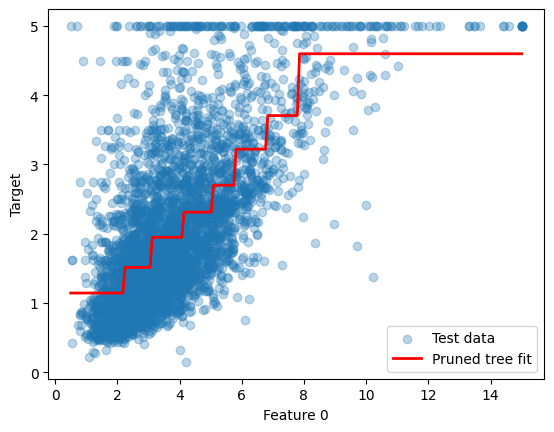

In [9]:
# 6. Compare effect of pruning visually (optional: feature 0 vs target)
# Plot only on first feature for visualization
X_plot = X_test[:, 0].reshape(-1, 1)
best_tree_small = DecisionTreeRegressor(
    max_depth=3, min_samples_leaf=10, random_state=0
)
best_tree_small.fit(X_train[:, [0]], y_train)

x_range = np.linspace(X_plot.min(), X_plot.max(), 200).reshape(-1, 1)
y_range = best_tree_small.predict(x_range)

plt.scatter(X_plot, y_test, alpha=0.3, label="Test data")
plt.plot(x_range, y_range, color="red", linewidth=2, label="Pruned tree fit")
plt.xlabel("Feature 0")
plt.ylabel("Target")
plt.legend()
plt.show()